In [47]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

from joblib import dump, load
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from dataclasses import dataclass


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Data load

csv file

In [3]:
#df1=pd.read_csv("/content/drive/MyDrive/Work_space/Project/singfy/american-sign-language_alpha.csv")
#df2=pd.read_csv("/content/drive/MyDrive/Work_space/Project/singfy/american-sign-language_number.csv")
df=pd.read_csv("/content/drive/MyDrive/Work_space/Project/singfy/american-sign-language_words.csv")
#df=pd.concat([df1,df2,df3])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Columns: 127 entries, x0 to 0
dtypes: float64(126), object(1)
memory usage: 392.0+ KB


In [4]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z33,z34,z35,z36,z37,z38,z39,z40,z41,0
0,0.047864,0.462494,0.726109,0.829821,0.912111,0.606487,0.761632,0.890177,1.0,0.420835,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NO
1,0.252859,0.740110,0.930695,0.899289,0.693852,0.757895,0.883756,0.963957,1.0,0.497704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NO
2,0.000000,0.248128,0.463858,0.635409,0.764508,0.393431,0.695981,0.860461,1.0,0.250866,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NO
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.215211,0.705367,0.299278,0.265015,0.360731,0.529209,0.255603,0.252454,0.355816,NO
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.092738,0.560371,0.312309,0.258538,0.247721,0.417853,0.236484,0.276581,0.349545,NO


In [5]:
df.describe(include="all")

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z33,z34,z35,z36,z37,z38,z39,z40,z41,0
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIKE
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
mean,0.121230,0.219433,0.343619,0.436042,0.465794,0.374728,0.562371,0.591796,0.583145,0.374157,...,0.110261,0.184377,0.130623,0.146477,0.148637,0.156049,0.116864,0.150226,0.177859,NaN
std,0.193319,0.274787,0.333791,0.355654,0.383055,0.256390,0.320795,0.324972,0.335838,0.235656,...,0.193774,0.236058,0.179691,0.204323,0.228137,0.226671,0.185223,0.230722,0.284040,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.042310,0.079076,0.026171,0.174637,0.451694,0.450777,0.392562,0.232128,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.102245,0.245038,0.418822,0.513404,0.376900,0.642035,0.723243,0.676834,0.421018,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.193703,0.402715,0.598960,0.787785,0.818228,0.589150,0.815539,0.814787,0.851613,0.522821,...,0.171081,0.407223,0.254105,0.260410,0.318684,0.321273,0.222148,0.239901,0.274554,NaN


In [6]:
label=list(df["0"])
#label=list(df["label"])
df['Category']=[str(x) for x in label]
#df.drop(['_id',],axis=1,inplace=True)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z34,z35,z36,z37,z38,z39,z40,z41,0,Category
0,0.047864,0.462494,0.726109,0.829821,0.912111,0.606487,0.761632,0.890177,1.0,0.420835,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NO,NO
1,0.252859,0.740110,0.930695,0.899289,0.693852,0.757895,0.883756,0.963957,1.0,0.497704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NO,NO
2,0.000000,0.248128,0.463858,0.635409,0.764508,0.393431,0.695981,0.860461,1.0,0.250866,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NO,NO
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.705367,0.299278,0.265015,0.360731,0.529209,0.255603,0.252454,0.355816,NO,NO
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.560371,0.312309,0.258538,0.247721,0.417853,0.236484,0.276581,0.349545,NO,NO


In [7]:
len(df.columns)

128

###Classification_model (label encoding)

In [8]:
df['Category']

,Category
0,NO
1,NO
2,NO
3,NO
4,NO
...,...
390,LIKE
391,LIKE
392,LIKE
393,LIKE


In [9]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Category' column
df['Category_Encoded'] = le.fit_transform(df['Category'])

In [10]:
le.transform(le.classes_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [11]:
# Create a mapping of categories to encoded values
#category_mapping = dict(zip(le.transform(le.classes_),le.classes_))
category_mapping = {int(k): v for k, v in zip(le.transform(le.classes_), le.classes_)}


print("classes:")
print(le.classes_)

print("\nCategory to Encoding Mapping:")
print(category_mapping)

classes:
['APPLE' 'CAN' 'GET' 'GOOD' 'HAVE' 'HELP' 'HOW' 'LIKE' 'LOVE' 'MY' 'NO'
 'SORRY' 'THANK-YOU' 'WANT' 'YES' 'YOU' 'YOUR']

Category to Encoding Mapping:
{0: 'APPLE', 1: 'CAN', 2: 'GET', 3: 'GOOD', 4: 'HAVE', 5: 'HELP', 6: 'HOW', 7: 'LIKE', 8: 'LOVE', 9: 'MY', 10: 'NO', 11: 'SORRY', 12: 'THANK-YOU', 13: 'WANT', 14: 'YES', 15: 'YOU', 16: 'YOUR'}


In [12]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z35,z36,z37,z38,z39,z40,z41,0,Category,Category_Encoded
0,0.047864,0.462494,0.726109,0.829821,0.912111,0.606487,0.761632,0.890177,1.0,0.420835,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NO,NO,10
1,0.252859,0.740110,0.930695,0.899289,0.693852,0.757895,0.883756,0.963957,1.0,0.497704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NO,NO,10
2,0.000000,0.248128,0.463858,0.635409,0.764508,0.393431,0.695981,0.860461,1.0,0.250866,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NO,NO,10
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.299278,0.265015,0.360731,0.529209,0.255603,0.252454,0.355816,NO,NO,10
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.312309,0.258538,0.247721,0.417853,0.236484,0.276581,0.349545,NO,NO,10


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
#from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV


In [15]:
X=df.iloc[:,:126].values
Y=df.iloc[:,-1].values

#X=X/330

print(X.shape)
print(Y.shape)

(395, 126)
(395,)


In [16]:
print(X)
print(Y)

[[0.04786368 0.46249435 0.72610868 ... 0.         0.         0.        ]
 [0.25285914 0.74010995 0.93069527 ... 0.         0.         0.        ]
 [0.         0.24812779 0.46385756 ... 0.         0.         0.        ]
 ...
 [0.01523023 0.         0.13599551 ... 0.         0.         0.        ]
 [0.         0.09225625 0.29592339 ... 0.         0.         0.        ]
 [0.         0.06247378 0.22454758 ... 0.         0.         0.        ]]
[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  4  4  4  4  4  4  4  4

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42,stratify=Y)


In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot  as plt
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test,save_path):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = le.classes_
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # plot confusion matrix
    plt.figure(figsize=(20,20))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)



    # Save the plot
    plt.savefig(os.path.join(save_path,"confision_matrix"))
    plt.show()
    plt.close()  # Close the figure to prevent display issues



    print('Classification Report:')
    report=classification_report(y_test, y_pred)
    print(classification_report(y_test, y_pred))


    # Define the file path
    report_path = os.path.join(save_path, "accuracy_report.txt")

    # Save accuracy and report to a TXT file
    with open(report_path, "w") as f:
        f.write("Classification Report:\n")
        f.write(report)

    print(f"Accuracy report saved at: {report_path}")

    return

### RFC

In [19]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],         # Number of trees
    'max_depth': [None, 10, 20],            # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],          # Minimum samples at leaf node
    'bootstrap': [True, False]              # Whether to use bootstrapping
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model on the full training set
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


KeyboardInterrupt: 

In [20]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Directory 'artifact/randomforest' created successfully!


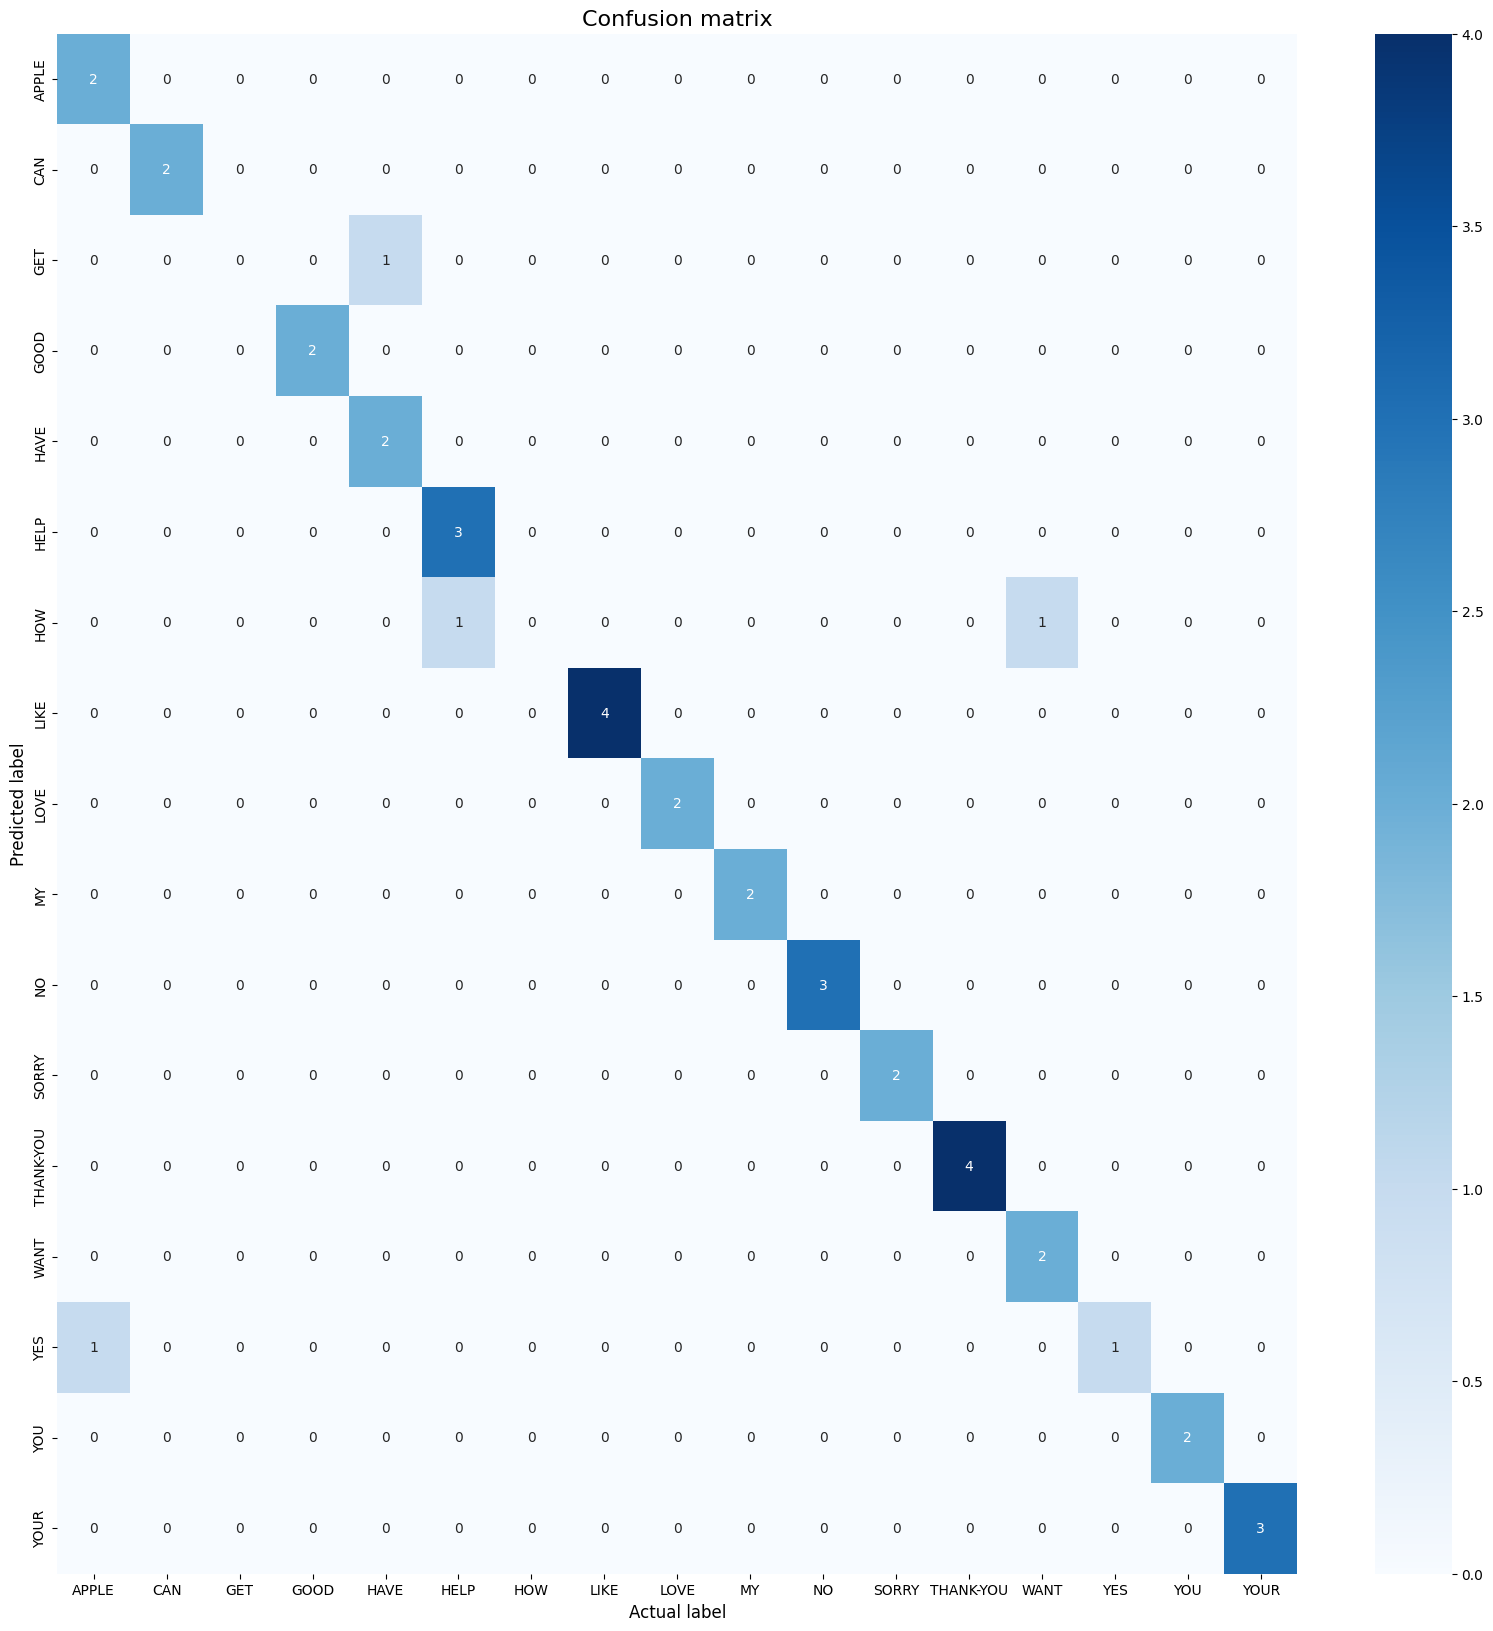

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         4
          13       0.67      1.00      0.80         2
          14       1.00      0.50      0.67         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         3

   

In [21]:
import os

# Define the path
random_dir = "artifact/randomforest"
# Create the directory if it does not exist
os.makedirs(random_dir, exist_ok=True)

print(f"Directory '{random_dir}' created successfully!")


# Save the model to a file
joblib.dump(rf, os.path.join(random_dir,'random_forest_words.joblib'))

# Save the LabelEncoder
joblib.dump(le, os.path.join(random_dir,'label_encoder.pkl'))


plot_confusion_matrix(rf, X_test, y_test,random_dir)

### GBC

In [50]:
# Initialize the model
gbm = GradientBoostingClassifier(n_estimators=10, learning_rate=0.2, max_depth=8, random_state=42,verbose= 1)


In [51]:
# Train the model
gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.1035            6.12m
         2       56642.4416            7.13m
         3       56642.4256            7.20m
         4       56642.4155            6.25m
         5       56642.4087            5.25m
         6       56642.4041            4.23m
         7       56642.4010            3.19m
         8       56642.3989            2.21m
         9       56642.3975            1.11m
        10       56642.3965            0.00s


GradientBoostingClassifier(learning_rate=0.2, max_depth=8, n_estimators=10,
                           random_state=42, verbose=1)

In [52]:
gbm.predict(X_test)

array([34, 34, 50, ..., 22, 50, 36])

Directory 'artifact/gradian_boost' created successfully!


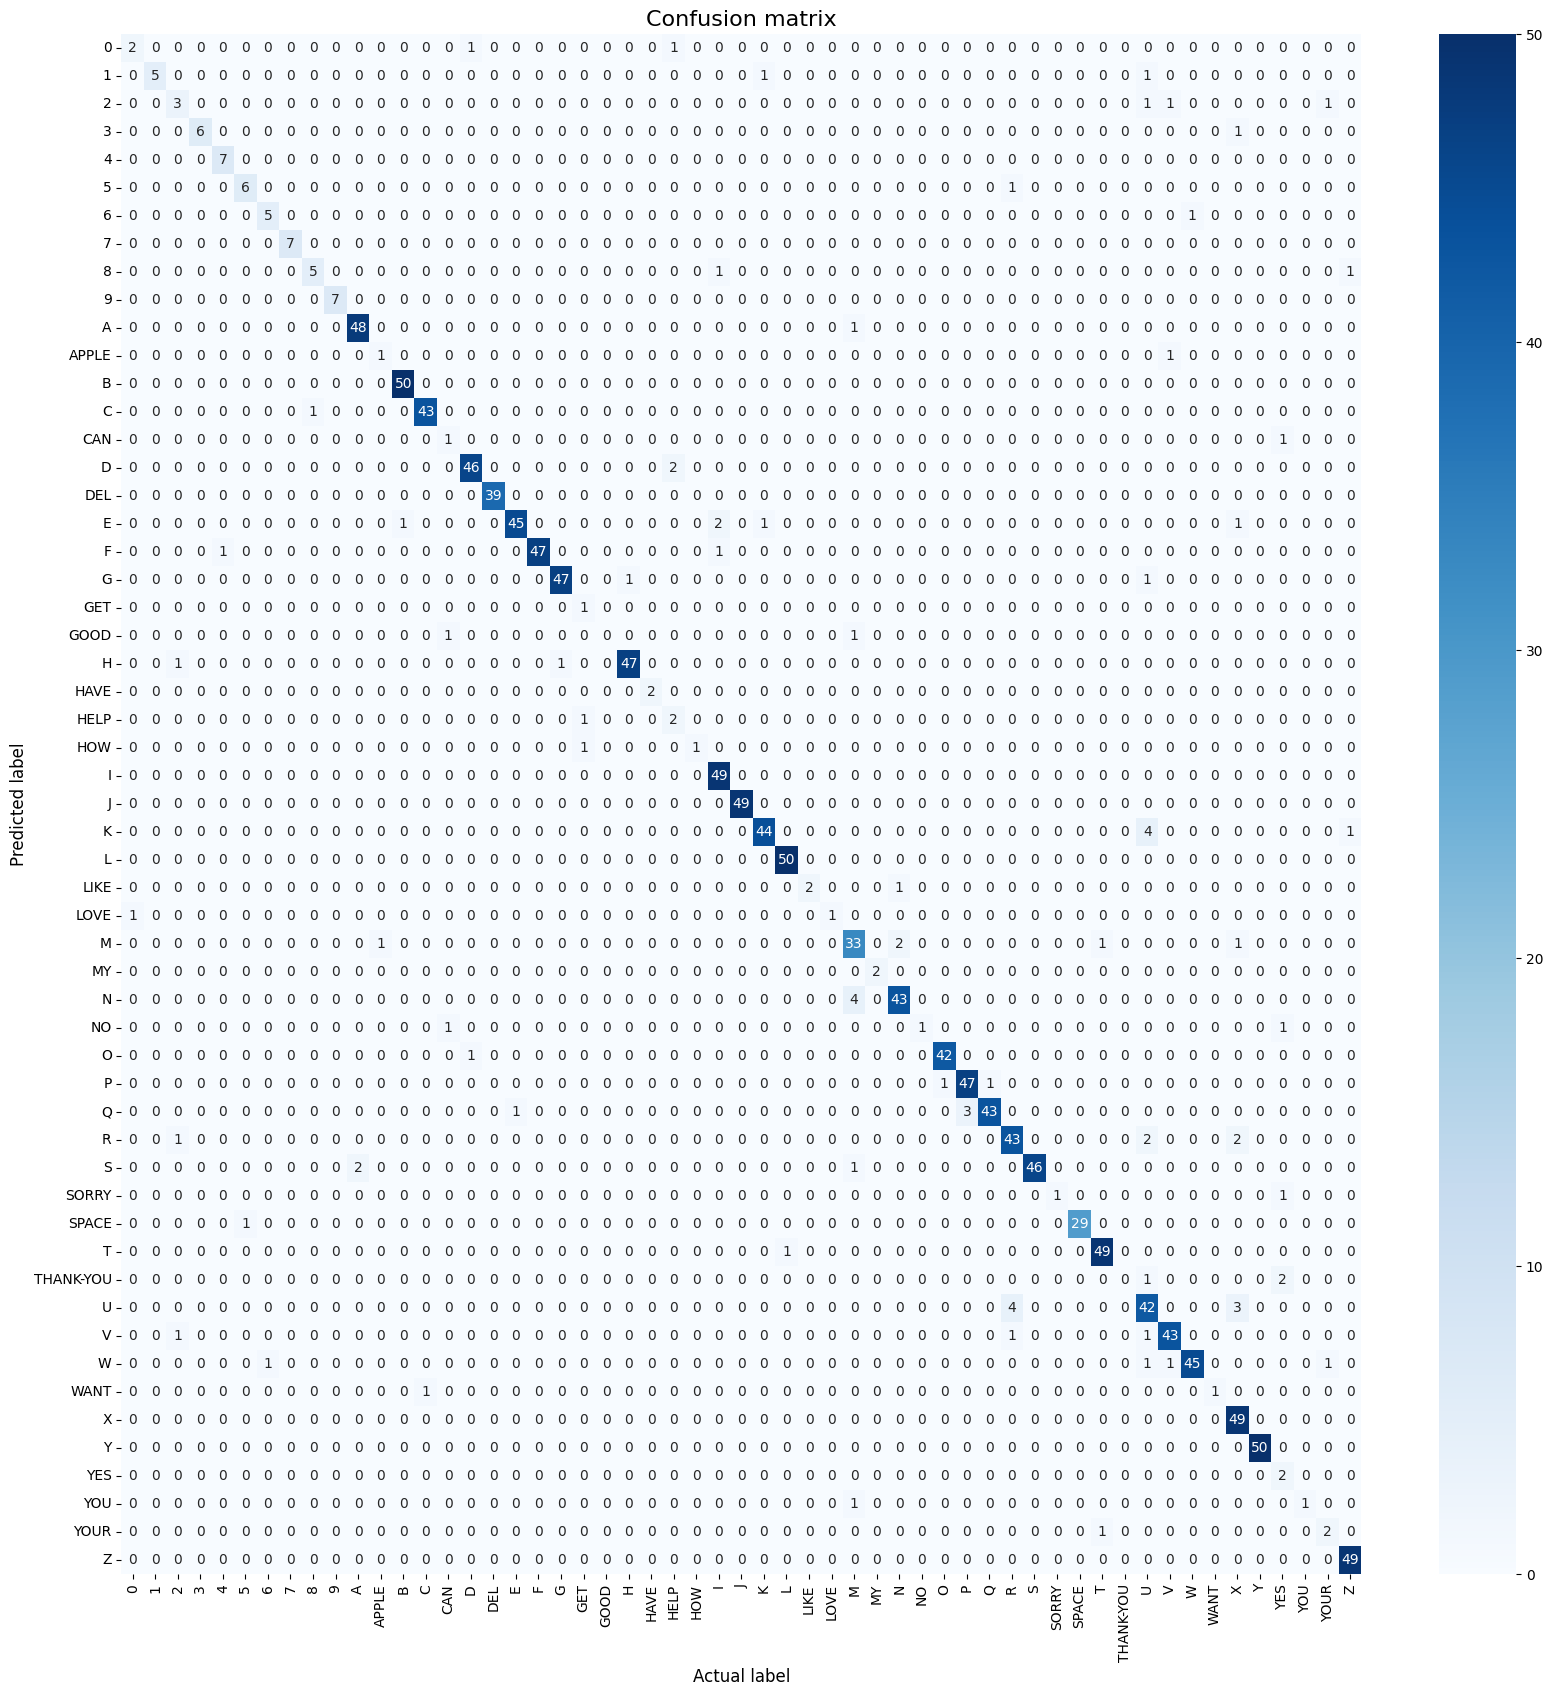

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       1.00      0.71      0.83         7
           2       0.50      0.50      0.50         6
           3       1.00      0.86      0.92         7
           4       0.88      1.00      0.93         7
           5       0.86      0.86      0.86         7
           6       0.83      0.83      0.83         6
           7       1.00      1.00      1.00         7
           8       0.83      0.71      0.77         7
           9       1.00      1.00      1.00         7
          10       0.96      0.98      0.97        49
          11       0.50      0.50      0.50         2
          12       0.98      1.00      0.99        50
          13       0.98      0.98      0.98        44
          14       0.33      0.50      0.40         2
          15       0.96      0.96      0.96        48
          16       1.00      1.00      1.00        39
    

In [53]:
import os

# Define the path
gb_dir = "artifact/gradian_boost"
# Create the directory if it does not exist
os.makedirs(gb_dir, exist_ok=True)

print(f"Directory '{gb_dir}' created successfully!")

# Save the model to a file
joblib.dump(gbm, os.path.join(gb_dir,'gbm.joblib'))

# Save the LabelEncoder
joblib.dump(le, os.path.join(gb_dir,'label_encoder.pkl'))

plot_confusion_matrix(gbm, X_test, y_test,gb_dir)

### CatBC

In [54]:
# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [6, 8, 10, 12]
}


In [57]:
# Initialize the CatBoostClassifier
model = CatBoostClassifier(verbose=0)

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')


In [ ]:
# Fit the model to the data
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [60]:
# Initialize the model
catboost_model = CatBoostClassifier(iterations=10, learning_rate=0.2, depth=12, verbose=1)

In [61]:
# Train the model
catboost_model.fit(X_train, y_train)

0:	learn: 1.6792166	total: 1m 48s	remaining: 16m 16s
1:	learn: 1.2910516	total: 3m 38s	remaining: 14m 32s
2:	learn: 1.0719909	total: 5m 23s	remaining: 12m 33s
3:	learn: 0.9215979	total: 7m 13s	remaining: 10m 49s
4:	learn: 0.7926267	total: 9m 4s	remaining: 9m 4s
5:	learn: 0.7017319	total: 11m 6s	remaining: 7m 24s
6:	learn: 0.6255803	total: 12m 55s	remaining: 5m 32s
7:	learn: 0.5560383	total: 14m 41s	remaining: 3m 40s
8:	learn: 0.5009990	total: 16m 29s	remaining: 1m 49s
9:	learn: 0.4496846	total: 18m 19s	remaining: 0us


In [62]:
X_test[0]

array([0.41622798, 0.74766595, 0.98578061, 1.        , 0.8457144 ,
       0.71076172, 0.66232463, 0.61245861, 0.5800547 , 0.38730861,
       0.40131335, 0.44242301, 0.45402882, 0.15423056, 0.25010312,
       0.38128763, 0.46994749, 0.        , 0.1138042 , 0.22902892,
       0.30141995, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.17302036, 0.22031845, 0.30134216,
       0.41770761, 0.51013595, 0.        , 0.43445668, 0.72331049,
       0.92673804, 0.0157959 , 0.57446019, 0.83000146, 1.        ,
       0.07895769, 0.59265141, 0.68505927, 0.69083052, 0.16072249,
       0.5070202 , 0.53711254, 0.49310735, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [63]:
catboost_model.predict(X_test)

array([[34],
       [30],
       [50],
       ...,
       [22],
       [50],
       [36]])

Directory 'artifact/cat_boost' created successfully!


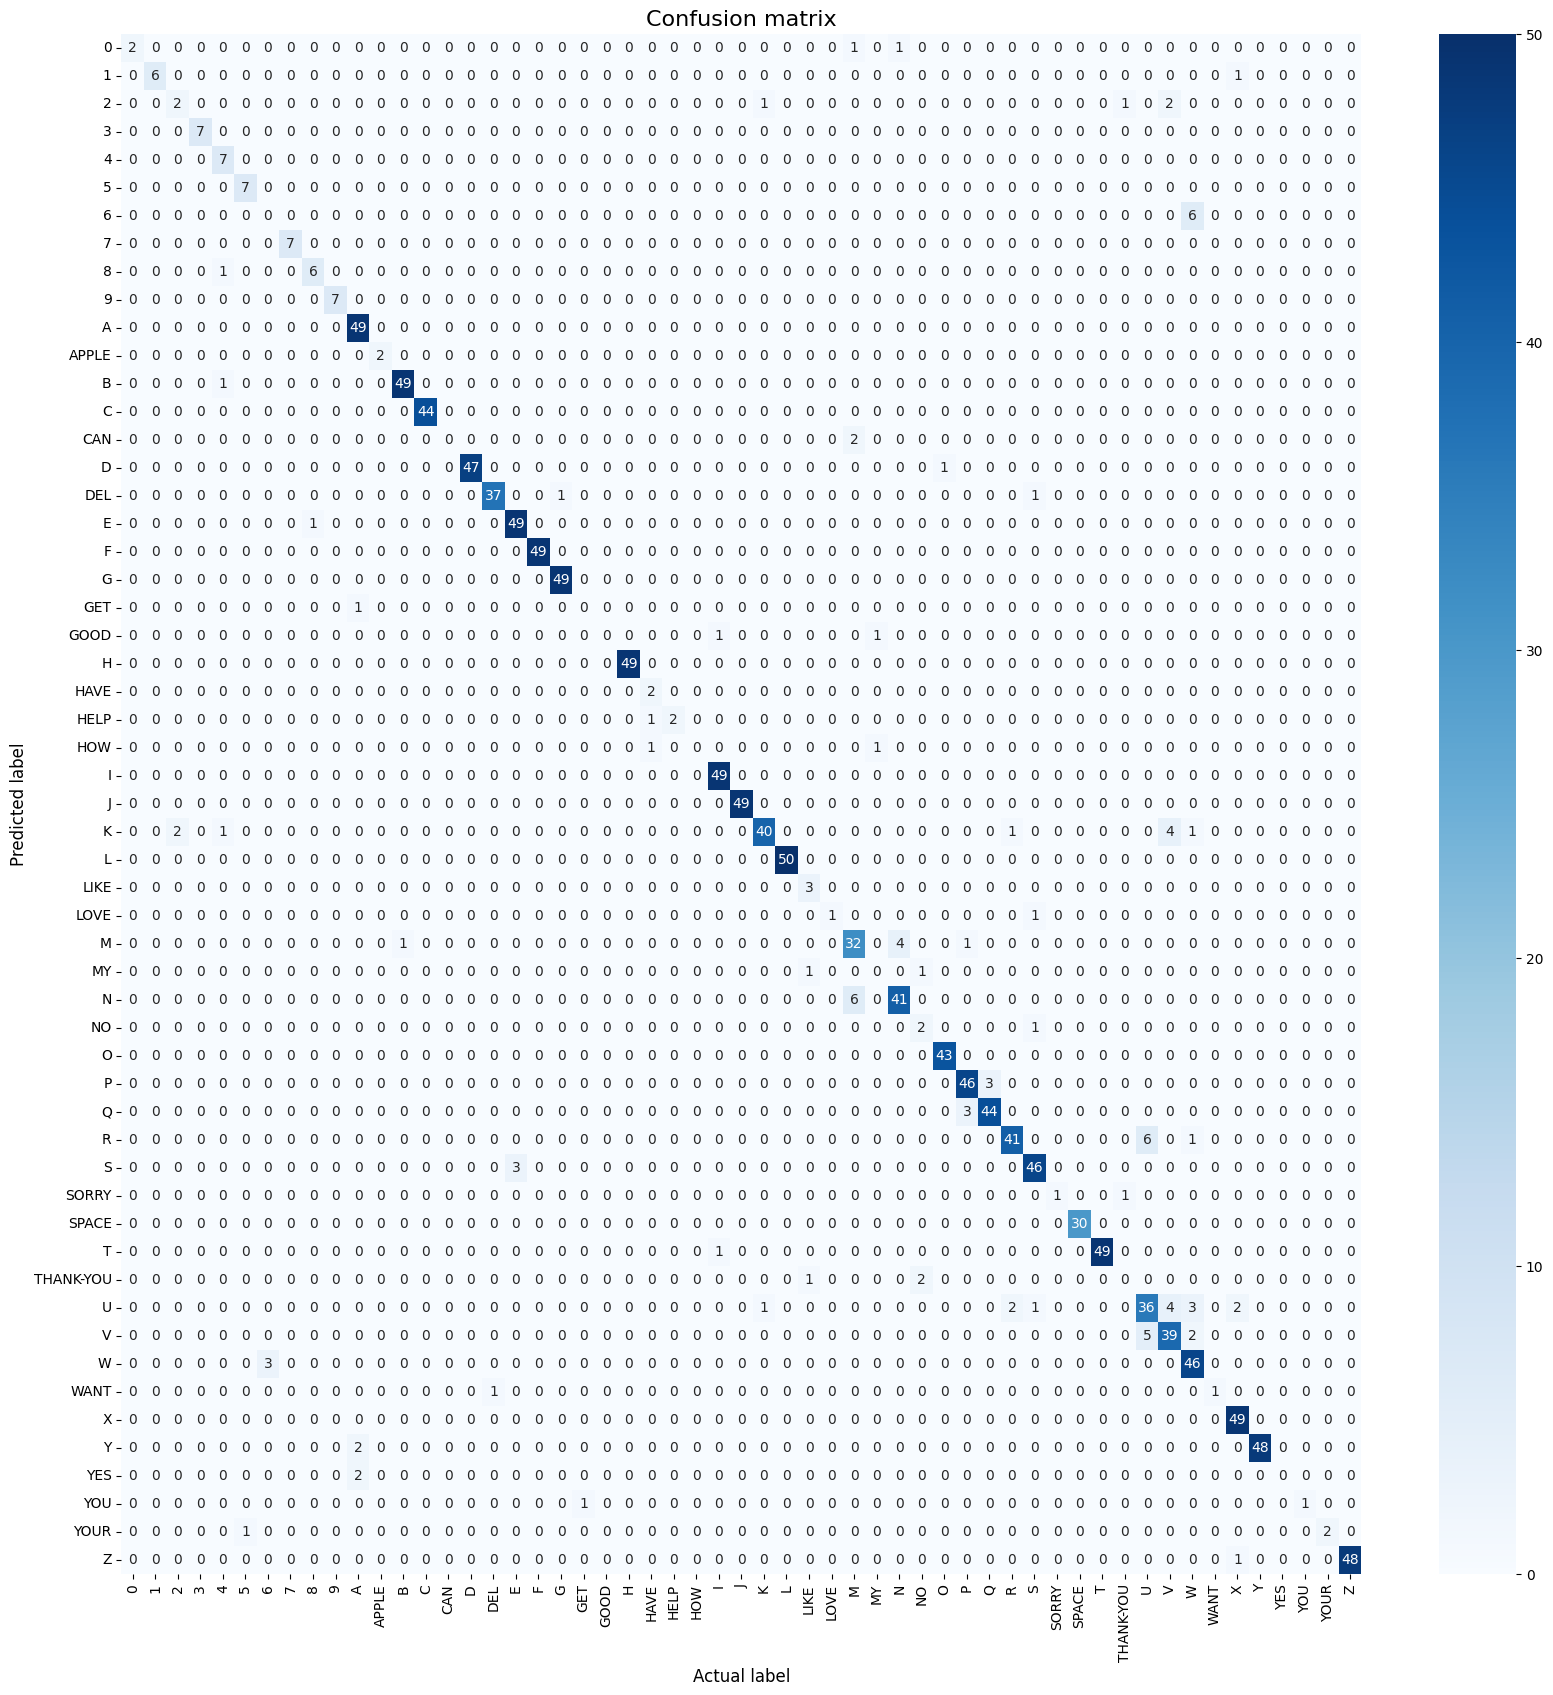

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      0.86      0.92         7
           2       0.50      0.33      0.40         6
           3       1.00      1.00      1.00         7
           4       0.70      1.00      0.82         7
           5       0.88      1.00      0.93         7
           6       0.00      0.00      0.00         6
           7       1.00      1.00      1.00         7
           8       0.86      0.86      0.86         7
           9       1.00      1.00      1.00         7
          10       0.91      1.00      0.95        49
          11       1.00      1.00      1.00         2
          12       0.98      0.98      0.98        50
          13       1.00      1.00      1.00        44
          14       0.00      0.00      0.00         2
          15       1.00      0.98      0.99        48
          16       0.97      0.95      0.96        39
    

In [64]:

import os

# Define the path
cat_dir = "artifact/cat_boost"
# Create the directory if it does not exist
os.makedirs(cat_dir, exist_ok=True)

print(f"Directory '{cat_dir}' created successfully!")

# Save the model to a file
joblib.dump(catboost_model, os.path.join(cat_dir,'cat.joblib'))
# Save the LabelEncoder
joblib.dump(le, os.path.join(cat_dir,'label_encoder.pkl'))

plot_confusion_matrix(catboost_model, X_test, y_test,cat_dir)

In [23]:
import subprocess

# Set environment variables and run the scp command
command = "scp -r /content/artifact '/content/drive/MyDrive/Work_space/Project/singfy'"
process = subprocess.Popen(command, shell=True, env={"LC_ALL": "C.UTF-8", "LANG": "C.UTF-8"})
process.wait()

0